In [144]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [145]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [146]:
df = df.drop(['customer_id', 'active_member', 'products_number', 'credit_card', 'churn'], axis=1)
df

,credit_score,country,gender,age,tenure,balance,estimated_salary
0,619,France,Female,42,2,0.00,101348.88
1,608,Spain,Female,41,1,83807.86,112542.58
2,502,France,Female,42,8,159660.80,113931.57
3,699,France,Female,39,1,0.00,93826.63
4,850,Spain,Female,43,2,125510.82,79084.10
...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,96270.64
9996,516,France,Male,35,10,57369.61,101699.77
9997,709,France,Female,36,7,0.00,42085.58
9998,772,Germany,Male,42,3,75075.31,92888.52


In [147]:
df.shape

(10000, 7)

In [148]:
df.head()

,credit_score,country,gender,age,tenure,balance,estimated_salary
0,619,France,Female,42,2,0.00,101348.88
1,608,Spain,Female,41,1,83807.86,112542.58
2,502,France,Female,42,8,159660.80,113931.57
3,699,France,Female,39,1,0.00,93826.63
4,850,Spain,Female,43,2,125510.82,79084.10


In [149]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'estimated_salary'],
      dtype='object')

In [150]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

df

,credit_score,country,gender,age,tenure,balance,estimated_salary
0,619,0,Female,42,2,0.00,101348.88
1,608,2,Female,41,1,83807.86,112542.58
2,502,0,Female,42,8,159660.80,113931.57
3,699,0,Female,39,1,0.00,93826.63
4,850,2,Female,43,2,125510.82,79084.10
...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,96270.64
9996,516,0,Male,35,10,57369.61,101699.77
9997,709,0,Female,36,7,0.00,42085.58
9998,772,1,Male,42,3,75075.31,92888.52


In [151]:
df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

df


,credit_score,country,gender,age,tenure,balance,estimated_salary
0,619,0,0,42,2,0.00,101348.88
1,608,2,0,41,1,83807.86,112542.58
2,502,0,0,42,8,159660.80,113931.57
3,699,0,0,39,1,0.00,93826.63
4,850,2,0,43,2,125510.82,79084.10
...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,96270.64
9996,516,0,1,35,10,57369.61,101699.77
9997,709,0,0,36,7,0.00,42085.58
9998,772,1,1,42,3,75075.31,92888.52


In [152]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [153]:
df1 = pd.read_csv('Bank Customer Churn Prediction.csv')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

le = LabelEncoder()
df1['country'] = le.fit_transform(df1['country'])
df1['gender'] = df1['gender'].replace(['Female', 'Male'], [0, 1])

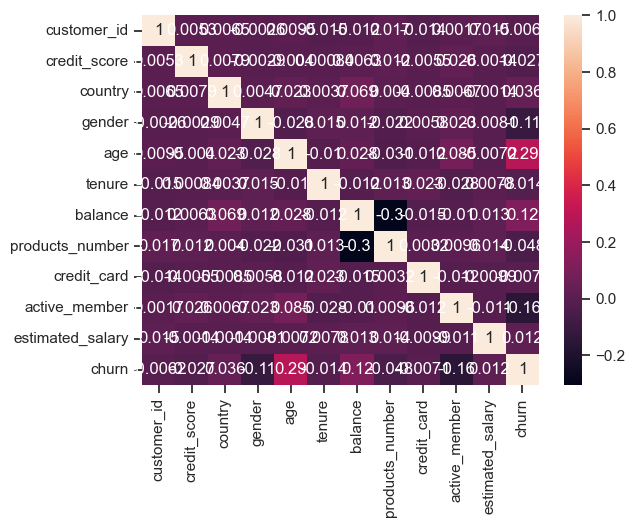

In [154]:
df1.drop(['age_group'], inplace=True, axis=1)
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [155]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'estimated_salary', 'age_group'],
      dtype='object')

In [156]:
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

<Axes: xlabel='credit_score'>

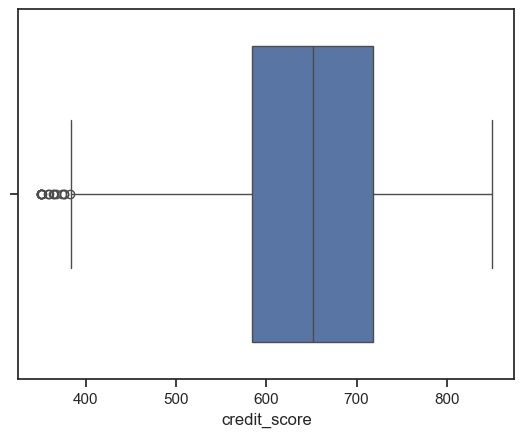

In [157]:
sns.boxplot(x=df['credit_score'])

<Axes: xlabel='gender'>

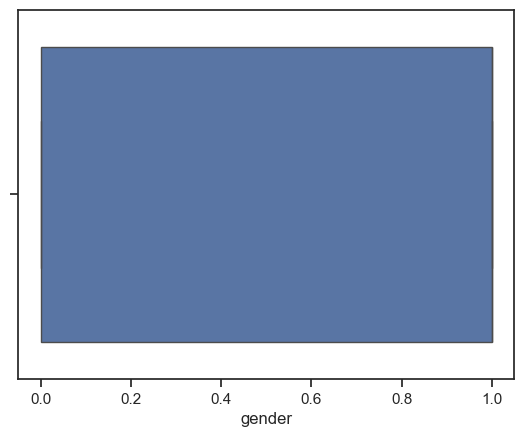

In [158]:
sns.boxplot(x=df['gender'])

<Axes: xlabel='age'>

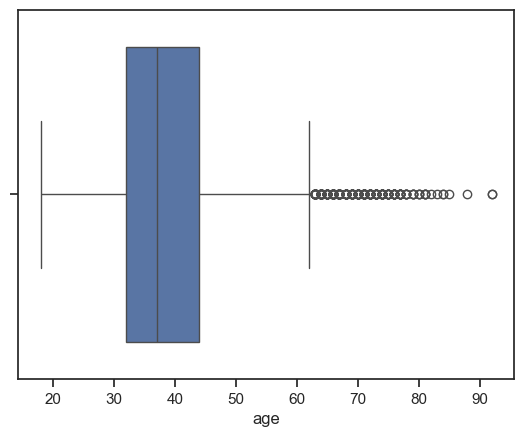

In [159]:
sns.boxplot(x=df['age'])

<Axes: xlabel='tenure'>

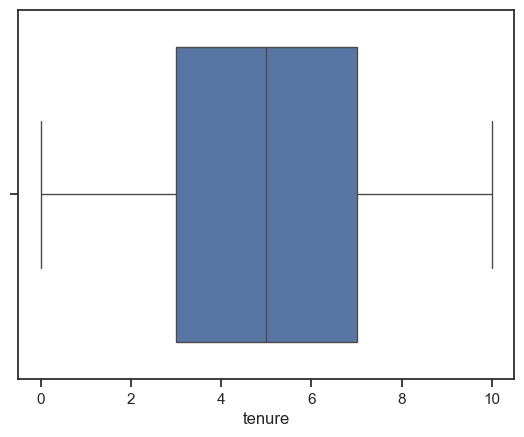

In [160]:
sns.boxplot(x=df['tenure'])

<Axes: xlabel='balance'>

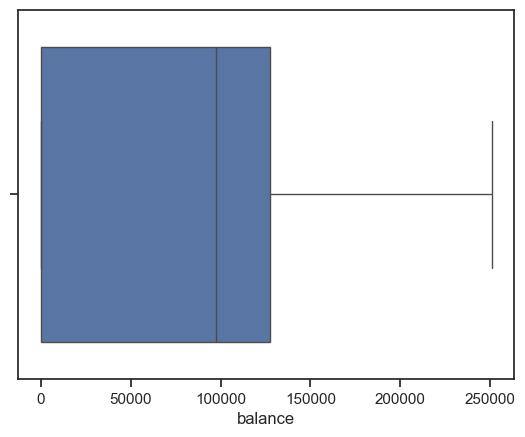

In [161]:
sns.boxplot(x=df['balance'])

<Axes: xlabel='estimated_salary'>

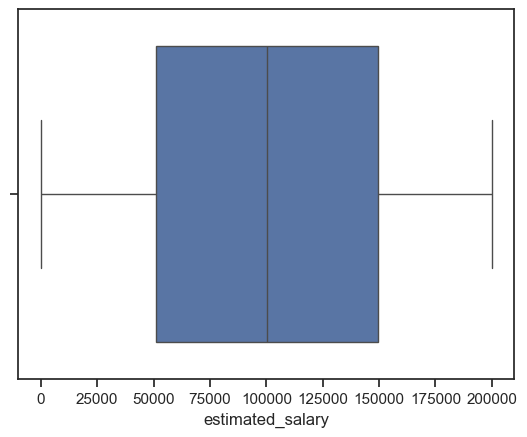

In [162]:
sns.boxplot(x=df['estimated_salary'])

<Axes: xlabel='age_group'>

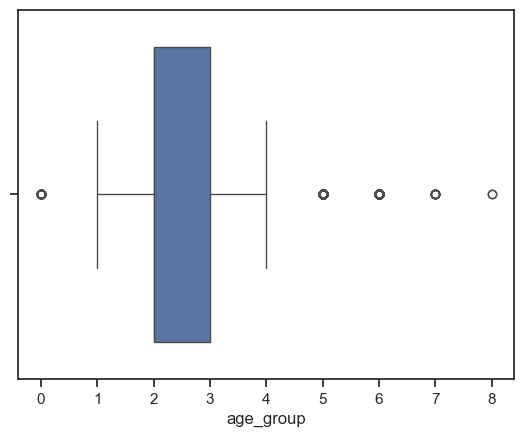

In [163]:
sns.boxplot(x=df['age_group'])

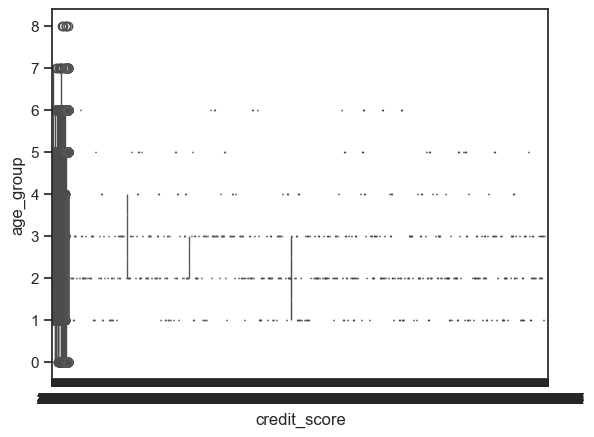

In [164]:
for i in countnious_col:
    sns.boxplot(data=df, x=i, y="age_group")

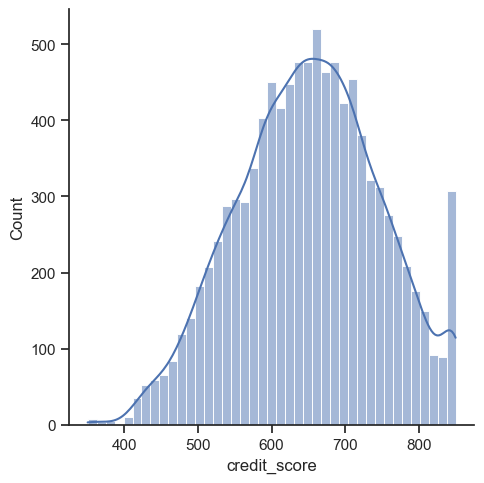

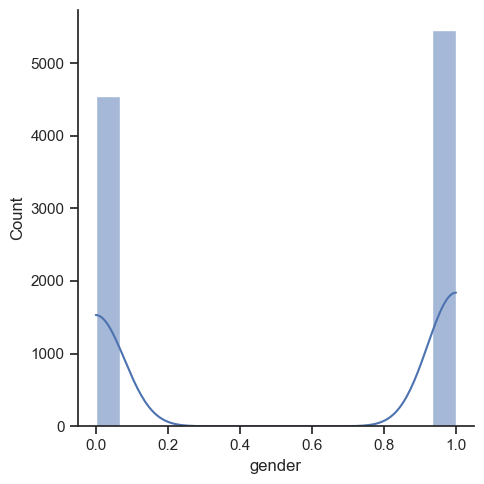

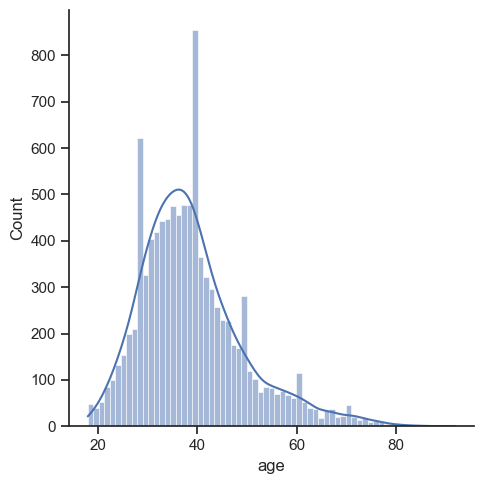

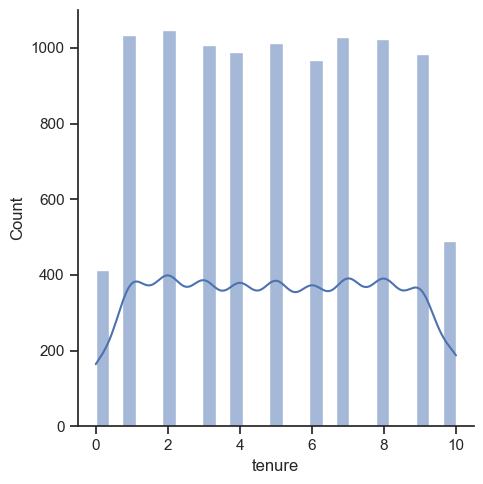

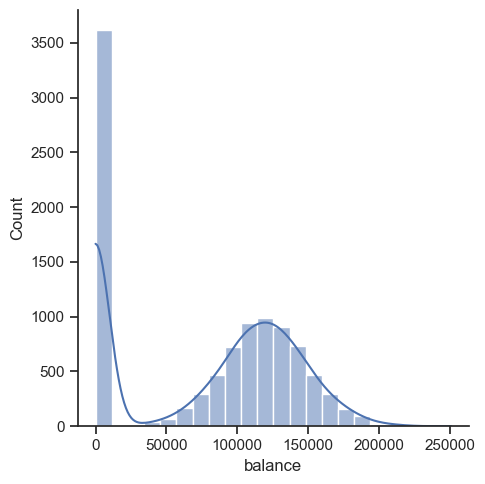

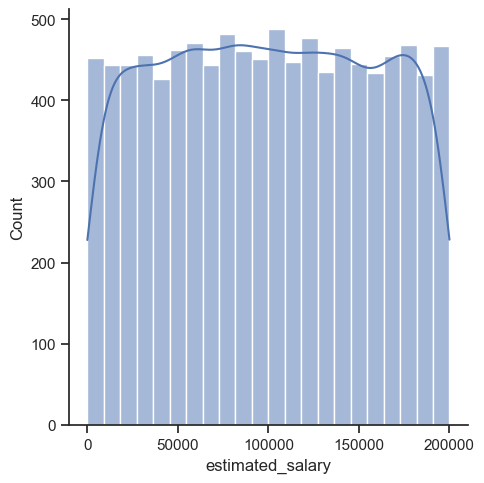

In [165]:
for i in countnious_col:
    sns.displot(df[i], kde=True)

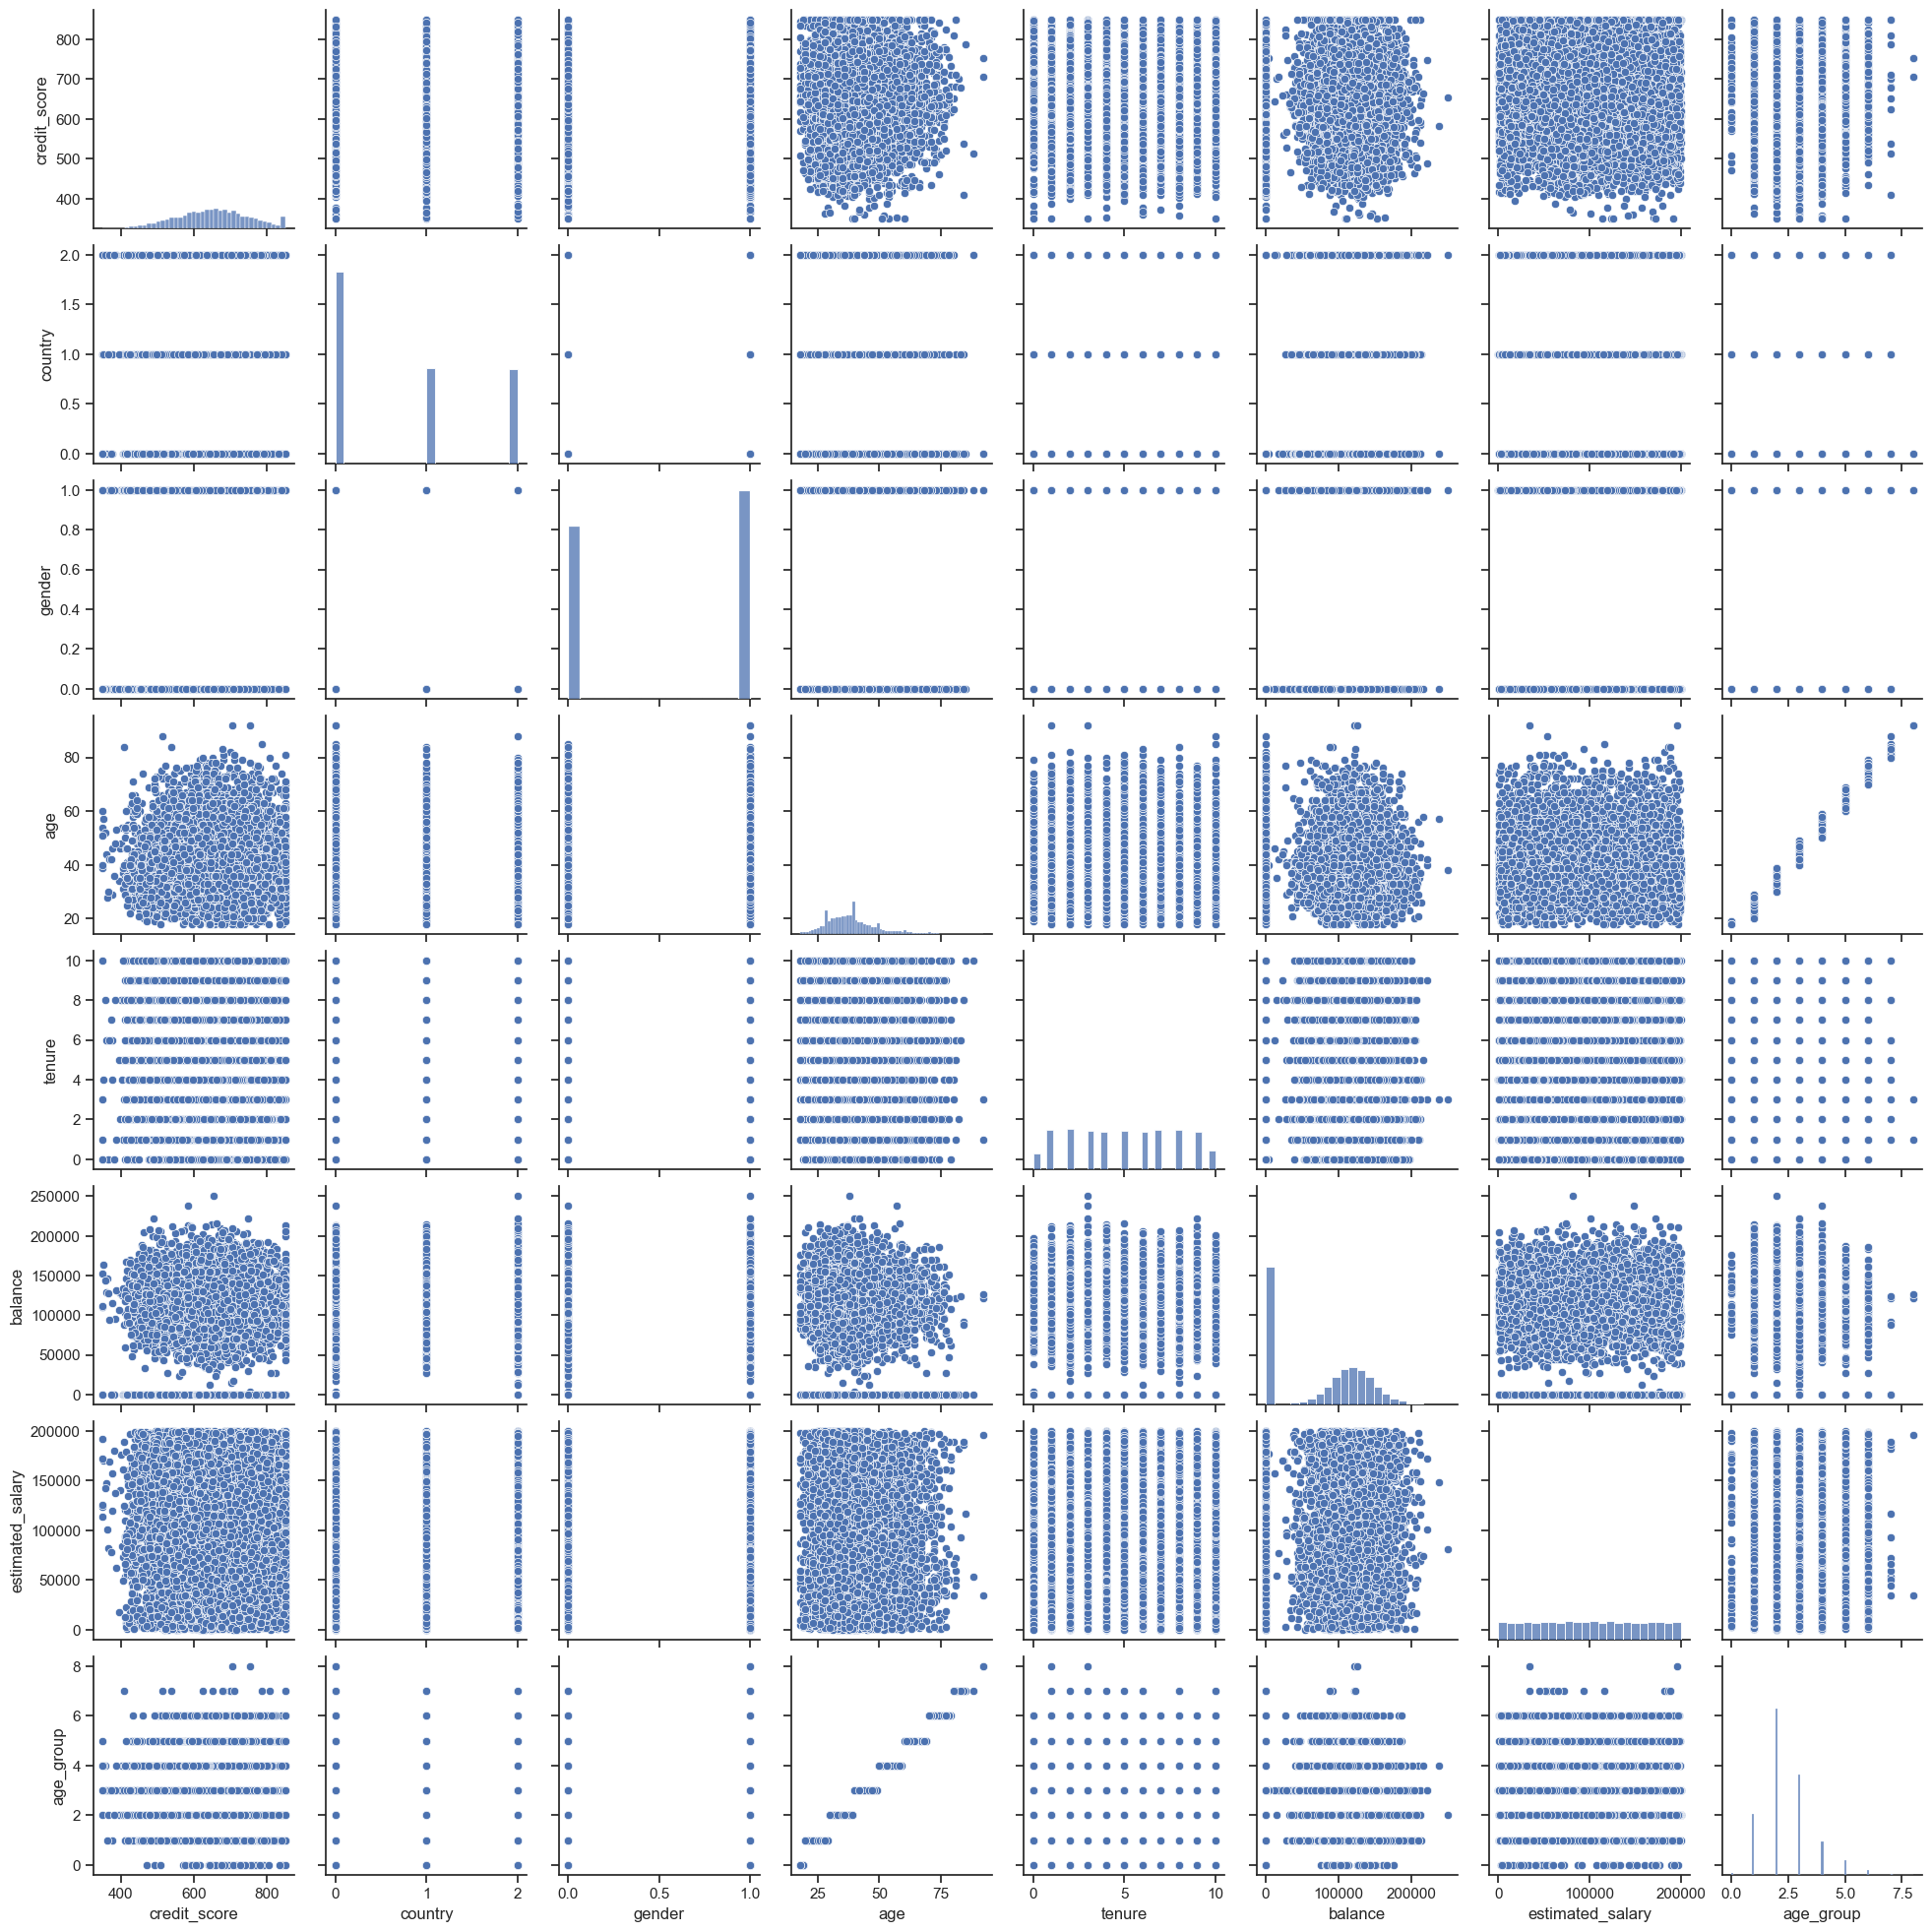

In [166]:
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

k-nearest neighbours

In [167]:
X = df.drop(['age_group'], axis=1) 
y = df['age_group']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)


knn_regressor.fit(X_train, y_train)


predictions = knn_regressor.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 1.4967777777777778


Decision Tree

In [168]:
decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 0.0005


SVM

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_regressor = SVR(kernel='linear')  
svm_regressor.fit(X_train, y_train)

predictions = svm_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 499729.3527977735


Random Forest

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

predictions = random_forest_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE Random Forest: {mse}')

MSE Random Forest: 0.00029015000000000003


Adaboost

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_regressor = AdaBoostRegressor(random_state=42)
adaboost_regressor.fit(X_train, y_train)

predictions = adaboost_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE AdaBoost: {mse}')

MSE AdaBoost: 4.33386057636666e-05
